<a href="https://colab.research.google.com/github/jshivamds272/Data-science-projects/blob/main/Boston_House_price_prediction_by_cross_validation_with_preprocessing_%2Cpipelines%2Cregression(lasso%2Cridge).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported necessary libraries

In [3]:
import numpy as np
import pickle 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

Load pickle file 

In [2]:
boston=pickle.load(open("/content/hBigCaU0QRiYoAmlNGEYjA_94c89106c77a45a9a75a0234ad42f966_boston_housing_clean.pickle",'rb'))

In [4]:
boston.keys() # see keys of boston

dict_keys(['dataframe', 'description'])

In [5]:
boston_data=boston['dataframe']  #separated dataset from pickle file
boston_description=boston['description']  #separated data discrition from pickle file

In [6]:
boston_data.head()  # top 5 rows of data sets

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
x=boston_data.drop('MEDV',axis=1)  # separate independent and dependent variables
y=boston_data.MEDV

In [8]:
kf=KFold(shuffle=True, random_state=72018,n_splits=3) #perform kfold for model_selection

In [9]:
kf.split(x)   #made object of kfold

<generator object _BaseKFold.split at 0x7f3d6d70f150>

In [10]:
for train_index,test_index in kf.split(x):      
  print('train index',train_index[:10],len(train_index))
  print('test index ',test_index[:10],len(test_index))
  print('')

train index [ 1  3  4  5  7  8 10 11 12 13] 337
test index  [ 0  2  6  9 15 17 19 23 25 26] 169

train index [ 0  2  6  9 10 11 12 13 15 17] 337
test index  [ 1  3  4  5  7  8 14 16 22 27] 169

train index [0 1 2 3 4 5 6 7 8 9] 338
test index  [10 11 12 13 18 20 21 24 28 31] 168



In [11]:
scores=[]
lr=LinearRegression()

for train_index,test_index in kf.split(x):
  x_train,x_test,y_train,y_test=(x.iloc[train_index, :],x.iloc[test_index, :],y[train_index],y[test_index])
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  score=r2_score(y_test.values,y_pred)
  scores.append(score)
scores

[0.6719348798472724, 0.7485020059212374, 0.6976807323597793]

preprocessing  by standardise data

In [12]:
scores=[]
lr=LinearRegression()
s=StandardScaler()

for train_index,test_index in kf.split(x):
  x_train,x_test,y_train,y_test=(x.iloc[train_index, :],x.iloc[test_index, :],y[train_index],y[test_index])
  x_train_s=s.fit_transform(x_train)

  lr.fit(x_train_s,y_train)
  x_test_s=s.transform(x_test)
  y_pred=lr.predict(x_test_s)
  score=r2_score(y_test.values,y_pred)
  scores.append(score)
scores

[0.6719348798472715, 0.7485020059212382, 0.6976807323597745]

Pipeline and cross_val_predict

In [13]:
s=StandardScaler()
lr=LinearRegression()

In [14]:
estimator=Pipeline([('scaler',s),('regression',lr)])

In [15]:
estimator.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [16]:
estimator.predict(x_test)

array([19.44230308, 22.8687781 , 20.72201438, 20.19685225, 16.02553328,
       13.19670707, 18.48717304, 16.41260539, 20.08040483, 19.16027923,
       23.03341265, 23.52809897, 24.64808538, 23.84554003, 22.37992895,
       18.54423788,  9.23453025, 24.86310535, 27.35965358, 29.95093715,
       21.71928179, 18.63649236, 19.67735609, 29.98064881, 20.78659698,
       17.29484103, 20.88767674, 23.59352298, 23.01287114, 24.82516061,
       28.1550891 , 26.59019417, 28.40170962, 28.61954803, 28.99730977,
       25.46130359, 20.83346878, 21.39384122, 21.12590183, 24.80991192,
       22.64896843, 20.63582629, 20.04498128, 20.28679691, 16.04272023,
       15.75494076, 12.78067624, 11.43558055, 21.98898014, 23.31730716,
       24.28692882, 21.28789025, 14.88646576, 31.00959189, 35.37282463,
       37.57270926, 23.58942636, 24.75302163, 30.63215847, 34.85770942,
       32.94090699, 30.0536187 , 39.86200512, 29.05010705, 35.53401305,
       41.89294309, 23.54417467, 23.61752172,  8.51966664, 24.38

### cross_val_predict
is a function that does k-fold cross validation for us,approximately fitting and transforming at every step of the way

In [17]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [19]:
predictions=cross_val_predict(estimator,x,y,cv=kf)

In [20]:
len(predictions)

506

In [21]:
r2_score(y,predictions)

0.706353106416156

In [22]:
np.mean(scores)

0.7060392060427615

Hyperparameter tunning

In [23]:
alphas=np.geomspace(1e-9,1e0,num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

Lasso regression

In [28]:
scores=[]
coefs=[]
for alpha in alphas:
  las=Lasso(alpha=alpha,max_iter=100000)
  
  estimator=Pipeline([('scaler',s),('lasso_regression',las)])
  predictions=cross_val_predict(estimator,x,y,cv=kf)
  score=r2_score(y,predictions)
  scores.append(score)

In [29]:
list(zip(alphas,scores))

[(1e-09, 0.7063531064981925),
 (1e-08, 0.7063531072356071),
 (1e-07, 0.7063531145602442),
 (1e-06, 0.7063531882052063),
 (1e-05, 0.7063539165191507),
 (0.0001, 0.706361268093463),
 (0.001, 0.706433467041546),
 (0.01, 0.7070865958083233),
 (0.1, 0.705838151167185),
 (1.0, 0.6512724532884888)]

In [30]:
Lasso(alpha=1e-6).fit(x,y).coef_


array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [31]:
Lasso(alpha=1).fit(x,y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

Text(0, 0.5, '$R^2$')

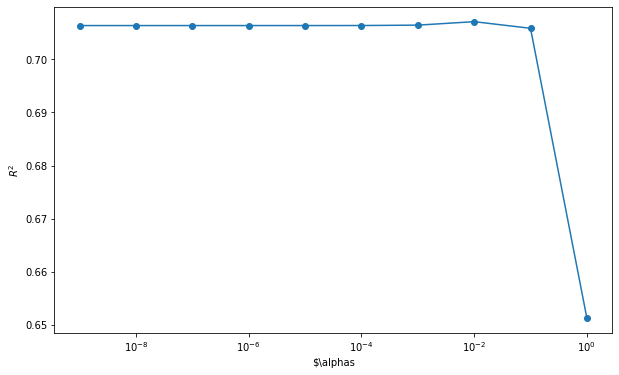

In [32]:
plt.figure(figsize=(10,6))   # visualise optimal point
plt.semilogx(alphas,scores,'-o')
plt.xlabel('$\\alphas')
plt.ylabel('$R^2$')

Polynomial Regression with lasso regrerssion

In [34]:
pf=PolynomialFeatures(degree=3)
scores=[]
alphas=np.geomspace(0.001,10,5)
for alpha in alphas:
  las=Lasso(alpha=alpha,max_iter=100000)

  estimator=Pipeline([('make_higher_degree',pf),('scaler',s),('lasso_regression',las)])  #PIPLINE of polynomial regression and standard scalling
  predictions=cross_val_predict(estimator,x,y,cv=kf)
  score=r2_score(y,predictions)
  scores.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.084e+01, tolerance: 2.735e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.343e+01, tolerance: 2.777e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [37]:
scores  # r2 scores for every value of alpha

[0.7697086980421659,
 0.8591002095361691,
 0.8280423631185617,
 0.7328688516176427,
 -0.000616160136140298]

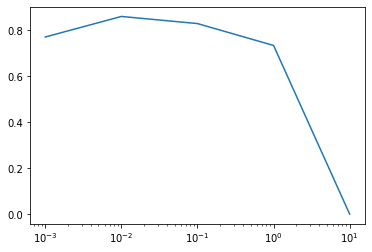

In [38]:
plt.semilogx(alphas,scores)    #plot semilogx plot to visualise optimal value of alpha

In [39]:
#best estimator  ,perform polynomial degree 2 via pipeline
best_estimator=Pipeline([('make_higher_degree',PolynomialFeatures(degree=2)),
                         ('scaler',s),('lasso_regression',Lasso(alpha=0.01,max_iter=10000))])
best_estimator.fit(x,y)
best_estimator.score(x,y)

0.9032551408154241

In [40]:
best_estimator.named_steps['lasso_regression'].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.61127587e+00,  0.00000000e+00,  6.24240557e-01,  0.00000000e+00,
       -7.22878514e+00,  9.74968793e+00,  0.00000000e+00,  0.00000000e+00,
        6.34548325e-01,  0.00000000e+00,  9.95741679e-01, -5.51374291e-03,
       -0.00000000e+00,  2.44370838e+00, -2.40444044e+00, -0.00000000e+00,
       -0.00000000e+00, -2.23044443e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.88128934e-01,  5.17203914e-01,  3.07715719e-01,
       -3.39853933e-01, -9.86590910e-02, -0.00000000e+00,  2.72847487e-01,
       -0.00000000e+00, -6.39829763e-01, -3.16474346e-01,  1.44555554e+00,
        0.00000000e+00, -0.00000000e+00, -8.84630187e-01,  1.32081558e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.63148300e+00,
       -2.62941147e-01,  0.00000000e+00,  9.08410143e-01, -8.17144528e-01,
        0.00000000e+00, -4.31628234e+00,  5.53254405e-01, -2.91912598e+00,
       -4.68486241e+00,  

Ridge Regression

In [41]:
from sklearn.linear_model import Ridge

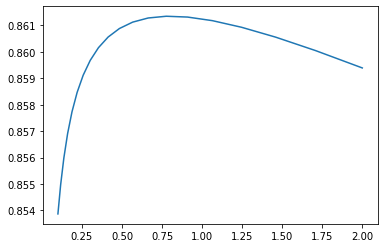

In [55]:
pf=PolynomialFeatures(degree=2)  #polynomial of degree 2
alphas=np.geomspace(0.1,2,20)
scores=[]
for alpha in alphas:
  ridge=Ridge(alpha=alpha,max_iter=10000)

  estimator=Pipeline([('polynomial_features',pf),('scaler',s),('ridge_regression',ridge)])  #pipeline of polynomial features,standardisation  ,ridge regression
  predictions=cross_val_predict(estimator,x,y,cv=kf)
  score=r2_score(y,predictions)
  scores.append(score)
  
plt.plot(alphas,scores)  #plot for optimal value of alpha

**coclusion**-both lasso and ridge regression with proper hyperparameter tuning give better results than linar regression

In [53]:
best_estimator=Pipeline([('make_higher_degree',PolynomialFeatures(degree=2,include_bias=False)),('scaler',s),('lasso_regression',Lasso(alpha=0.01))])

best_estimator.fit(x_train,y_train)
predict=best_estimator.predict(x_test)
r2_score(y_test,predict)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.721e+02, tolerance: 3.030e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8615001051948262

We got 90% accuracy by using pipline of polynomial feature , standard scale and lasso or ridge regression